<a href="https://colab.research.google.com/github/insoucyant/Learn_Python/blob/master/Indian_SPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.youtube.com/watch?v=SEQbb8w7VTw
# Description: This program uses the dual moving average crossover to determine when to buy and sell stock

In [2]:
# Import the libraries
#!pip install quandl
import pandas as pd
import numpy as np
# import quandl
# quandl.ApiConfig.api_key = 'zn4eGJ_9YNAL7H_pz3L6'
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import sys
import os

### yahoo Finance

In [ ]:
#!pip install yfinance
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


### function

In [ ]:
#Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(df)):
    if df['SMA30'][i] > df['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(df['Stock_Price'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif df['SMA30'][i] < df['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(df['Stock_Price'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

# Indigo

In [ ]:
stock = 'Indigo'
Indigo_in = yf.Ticker("INDIGO.NS")
# get stock info
print(Indigo_in.info)

{'address1': 'Tower-C', 'address2': 'Levels 1-5 Global Business Park MG Road', 'city': 'Gurugram', 'zip': '122002', 'country': 'India', 'phone': '91 12 4435 2500', 'fax': '91 12 4406 8536', 'website': 'https://www.goindigo.in', 'industry': 'Airlines', 'industryKey': 'airlines', 'industryDisp': 'Airlines', 'sector': 'Industrials', 'sectorKey': 'industrials', 'sectorDisp': 'Industrials', 'longBusinessSummary': 'InterGlobe Aviation Limited operates IndiGo airline in India and internationally. It offers air transportation and pre-flight and post flight ground handling operations which includes passenger and cargo services; and provides related allied services, such as in-flight sales, business of ground handling, and other allied services at the airports. The company was incorporated in 2004 and is headquartered in Gurugram, India.', 'fullTimeEmployees': 32407, 'companyOfficers': [{'maxAge': 1, 'name': 'Mr. Petrus Johannes Theodorus Elbers', 'age': 53, 'title': 'Chief Executive Officer', '

In [ ]:
# get historical market data
df_in = Indigo_in.history(period="4400d")
df_in.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-11-10 00:00:00+05:30,811.290167,852.717359,804.843844,831.624573,27351793,0.0,0.0
2015-11-13 00:00:00+05:30,870.255186,978.326091,869.307196,951.877136,8446622,0.0,0.0
2015-11-16 00:00:00+05:30,958.418314,985.910036,915.995743,937.515137,3358159,0.0,0.0
2015-11-17 00:00:00+05:30,938.510422,995.295066,925.428167,982.971191,3694092,0.0,0.0
2015-11-18 00:00:00+05:30,964.343343,1013.212300,962.494750,991.266296,3621593,0.0,0.0


In [ ]:
df_in.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-05 00:00:00+05:30,3225.050049,3300.000000,3154.550049,3171.149902,3430174,0.0,0.0
2024-02-06 00:00:00+05:30,3190.050049,3191.100098,3070.750000,3137.850098,1007663,0.0,0.0
2024-02-07 00:00:00+05:30,3169.000000,3189.000000,3106.500000,3114.550049,636345,0.0,0.0
2024-02-08 00:00:00+05:30,3140.000000,3168.550049,3115.000000,3132.399902,762163,0.0,0.0
2024-02-09 00:00:00+05:30,3130.000000,3157.500000,2984.199951,3105.949951,1667210,0.0,0.0


In [ ]:
SMA30 = pd.DataFrame()
SMA30['SMA30'] = df_in['Close'].rolling(window=30).mean()
SMA100 = pd.DataFrame()
SMA100['SMA100'] = df_in['Close'].rolling(window=100).mean()
# Exponetial Moving Average
EMA26 = pd.DataFrame()
EMA12 = pd.DataFrame()
MACD = pd.DataFrame()
EMA26['ema26'] = df_in['Close'].ewm(span = 26).mean().fillna(0)
EMA12['ema12'] = df_in['Close'].ewm(span = 12).mean().fillna(0)
MACD['macd'] = EMA12['ema12'] - EMA26['ema26']

<function matplotlib.pyplot.show(close=None, block=None)>

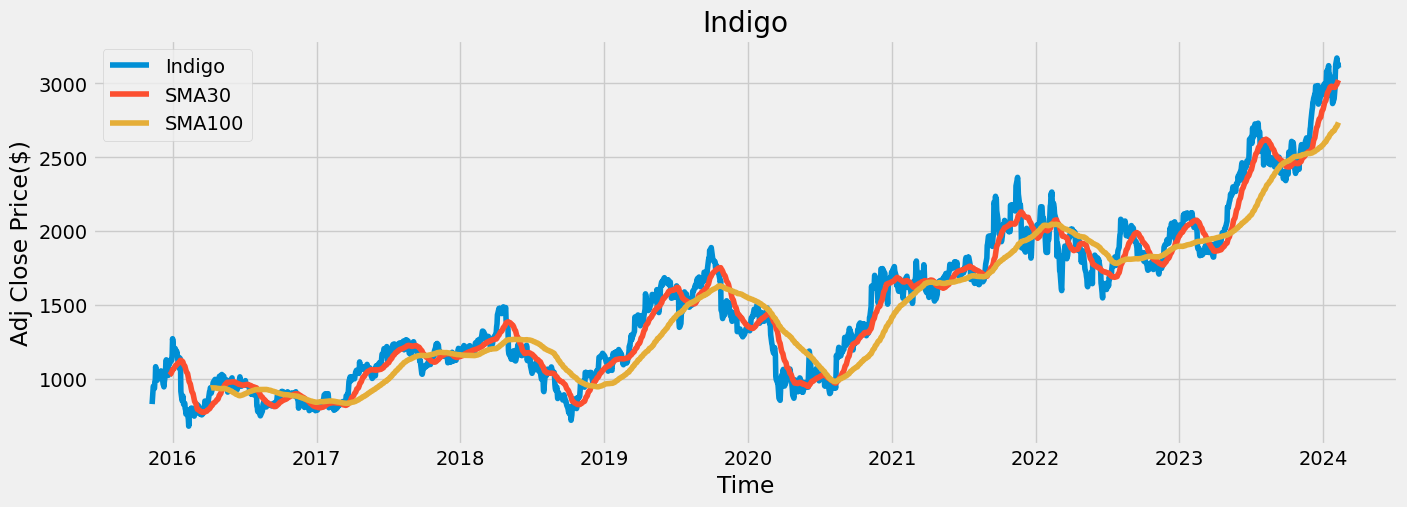

In [ ]:
#Visualize the data
plt.figure(figsize=(15,5))
plt.plot(df_in['Close'], label='Indigo')
plt.plot(SMA30['SMA30'], label = 'SMA30')
plt.plot(SMA100['SMA100'], label = 'SMA100')
plt.title('Indigo')
plt.xlabel('Time')
plt.ylabel('Adj Close Price($)')
plt.legend(loc='upper left')
plt.show

In [ ]:
# Create a new DataFrame to store all the data
df =  pd.DataFrame()
df['Stock_Price'] = df_in['Close']
df['SMA30'] = SMA30['SMA30']
df['SMA100'] = SMA100['SMA100']
df['SMA_diff'] = df['SMA30'] - df['SMA100']
df

,Stock_Price,SMA30,SMA100,SMA_diff
Date,,,,
2015-11-10 00:00:00+05:30,831.624573,NaN,NaN,NaN
2015-11-13 00:00:00+05:30,951.877136,NaN,NaN,NaN
2015-11-16 00:00:00+05:30,937.515137,NaN,NaN,NaN
2015-11-17 00:00:00+05:30,982.971191,NaN,NaN,NaN
2015-11-18 00:00:00+05:30,991.266296,NaN,NaN,NaN
...,...,...,...,...
2024-02-05 00:00:00+05:30,3171.149902,2993.640015,2709.576506,284.063508
2024-02-06 00:00:00+05:30,3137.850098,3002.521688,2716.220007,286.301681
2024-02-07 00:00:00+05:30,3114.550049,3008.970020,2722.357007,286.613013


In [ ]:
buy_sell = buy_sell(df)
df['Buy_Signal_Price'] = buy_sell[0]
df['Sell_Signal_Price'] = buy_sell[1]

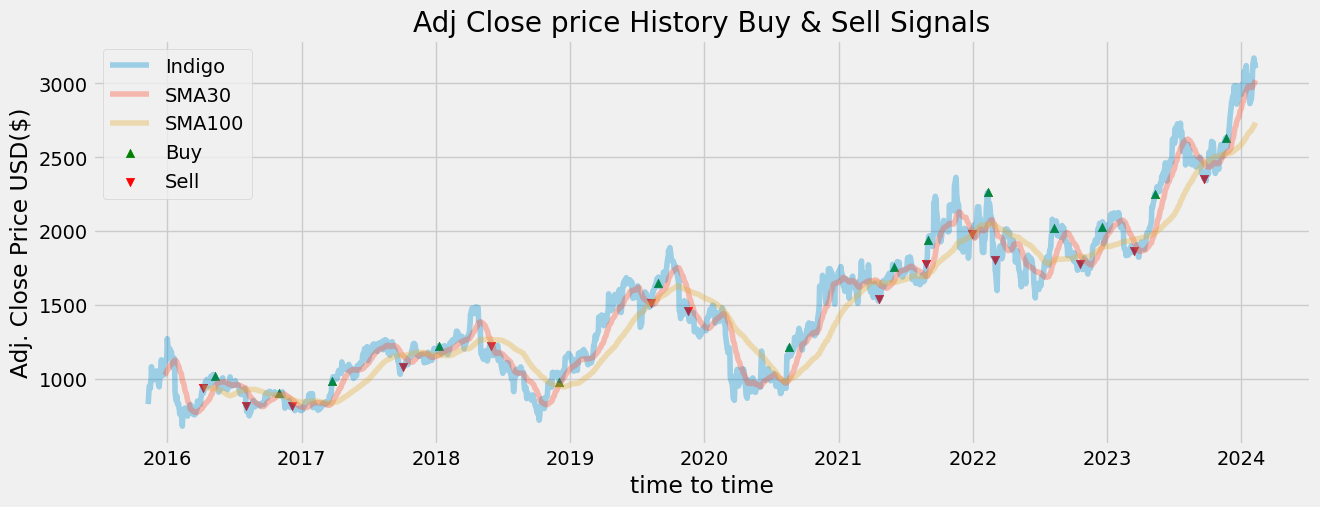

In [ ]:
# Visualize the data and teh strategy to buy and sell the stock
plt.figure(figsize=(14,5))
plt.plot(df['Stock_Price'], label=stock, alpha = 0.35)
plt.plot(df['SMA30'], label='SMA30', alpha = 0.35)
plt.plot(df['SMA100'], label='SMA100', alpha = 0.35)
#plt.plot(df['SMA_diff'], label='SMA_diff', alpha = 0.95)
plt.scatter(df.index, df['Buy_Signal_Price'], label='Buy', marker= '^', color='green')
plt.scatter(df.index, df['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Adj Close price History Buy & Sell Signals')
plt.xlabel('time to time')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()


# Apple`

In [ ]:
#Import data here
# data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'MSFT', 'WMT'],
#                         qopts = { 'columns': ['ticker', 'date', 'adj_close'] },
#                         date = { 'gte': '2015-12-31', 'lte': '2016-12-31' },
#                         paginate=True)
stock = 'AAPL'
df_in = quandl.get('EOD/AAPL')
df_in.tail()


,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,168.197501,169.984062,168.129901,169.008696,20949896.0
2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,168.690012,169.408500,168.516185,169.008696,16349444.0
2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,164.943062,165.590087,163.860503,164.720949,33185536.0
2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,164.267066,164.923748,163.890440,164.749921,21498213.0
2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,165.136204,165.957057,164.634036,165.213461,16480187.0


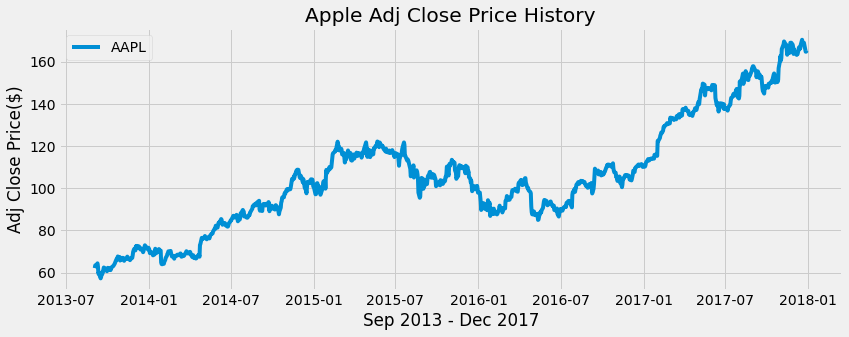

In [ ]:
#Visualize the Data
plt.figure(figsize=(12.5,4.5))
plt.plot(df_in['Adj_Close'], label = stock)
plt.title('Apple Adj Close Price History')
plt.xlabel('Sep 2013 - Dec 2017')
plt.ylabel('Adj Close Price($)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Create the Simple Moving Average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj_Close'] = df_in['Adj_Close'].rolling(window=30).mean()
SMA30
#EMA 9/16/26/50/120


,Adj_Close
Date,
2013-09-03,NaN
2013-09-04,NaN
2013-09-05,NaN
2013-09-06,NaN
2013-09-09,NaN
...,...
2017-12-21,166.373532
2017-12-22,166.365873
2017-12-26,166.233893


In [ ]:
# Create the Simple Moving Average with a 100 day window
SMA100 = pd.DataFrame()
SMA100['Adj_Close'] = df_in['Adj_Close'].rolling(window=100).mean()
SMA100

,Adj_Close
Date,
2013-09-03,NaN
2013-09-04,NaN
2013-09-05,NaN
2013-09-06,NaN
2013-09-09,NaN
...,...
2017-12-21,157.303193
2017-12-22,157.487327
2017-12-26,157.643630


<function matplotlib.pyplot.show>

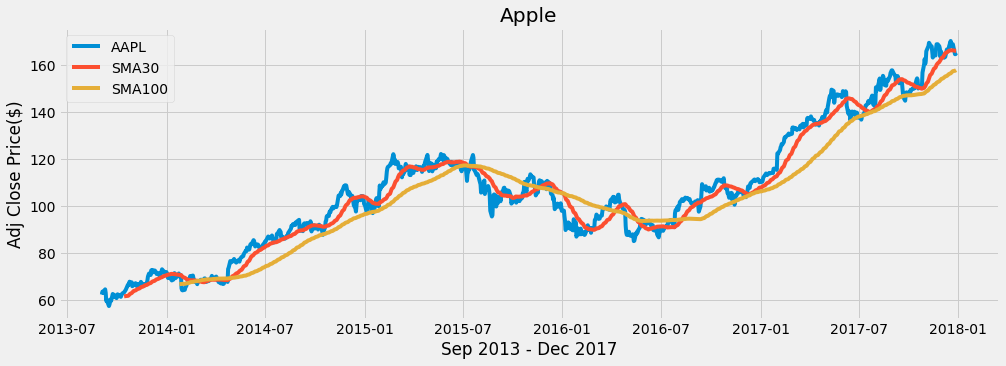

In [ ]:
#Visualize the data
plt.figure(figsize=(15,5))
plt.plot(df_in['Adj_Close'], label=stock)
plt.plot(SMA30['Adj_Close'], label='SMA30')
plt.plot(SMA100['Adj_Close'], label = 'SMA100')
plt.title('Apple')
plt.xlabel('Sep 2013 - Dec 2017')
plt.ylabel('Adj Close Price($)')
plt.legend(loc='upper left')
plt.show

In [ ]:
# Create a new DataFrame to store all the data
df =  pd.DataFrame()
df['Stock_Price'] = df_in['Adj_Close']
df['SMA30'] = SMA30['Adj_Close']
df['SMA100'] = SMA100['Adj_Close']
df['SMA_diff'] = df['SMA30'] - df['SMA100']
df

,Stock_Price,SMA30,SMA100,SMA_diff
Date,,,,
2013-09-03,62.127225,NaN,NaN,NaN
2013-09-04,63.412927,NaN,NaN,NaN
2013-09-05,62.977917,NaN,NaN,NaN
2013-09-06,63.353036,NaN,NaN,NaN
2013-09-09,64.363948,NaN,NaN,NaN
...,...,...,...,...
2017-12-21,169.008696,166.373532,157.303193,9.070339
2017-12-22,169.008696,166.365873,157.487327,8.878546
2017-12-26,164.720949,166.233893,157.643630,8.590263


In [ ]:
#Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(df)):
    if df['SMA30'][i] > df['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(df['Stock_Price'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif df['SMA30'][i] < df['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(df['Stock_Price'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [ ]:
buy_sell = buy_sell(df)
df['Buy_Signal_Price'] = buy_sell[0]
df['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
df

,Stock_Price,SMA30,SMA100,SMA_diff
Date,,,,
2012-01-02,427.20,NaN,NaN,NaN
2012-01-03,439.15,NaN,NaN,NaN
2012-01-04,443.25,NaN,NaN,NaN
2012-01-05,442.55,NaN,NaN,NaN
2012-01-06,452.50,NaN,NaN,NaN
...,...,...,...,...
2020-04-30,1001.75,898.846667,1132.5055,-233.658833
2020-05-11,915.95,896.076667,1129.2105,-233.133833
2020-05-12,901.15,893.606667,1125.7600,-232.153333


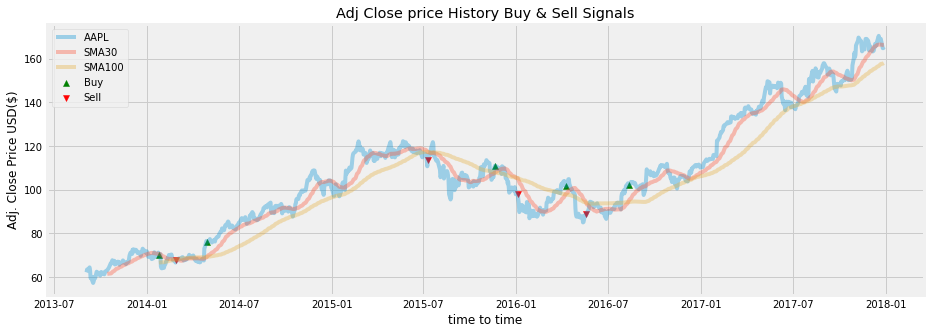

In [ ]:
# Visualize the data and teh strategy to buy and sell the stock
plt.figure(figsize=(14,5))
plt.plot(df['Stock_Price'], label=stock, alpha = 0.35)
plt.plot(df['SMA30'], label='SMA30', alpha = 0.35)
plt.plot(df['SMA100'], label='SMA100', alpha = 0.35)
#plt.plot(df['SMA_diff'], label='SMA_diff', alpha = 0.95)
plt.scatter(df.index, df['Buy_Signal_Price'], label='Buy', marker= '^', color='green')
plt.scatter(df.index, df['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Adj Close price History Buy & Sell Signals')
plt.xlabel('time to time')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()


# HDFC

In [ ]:
from datetime import date
stock = 'HDFC'
today = date.today()
HDFC = quandl.get('BSE/BOM500180', start_date='2012-01-01', end_date=today)
df_in= HDFC.reset_index()
df_in.tail()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
2060,2020-04-30,1001.00,1018.9,992.25,1001.75,1006.41,728396.0,24928.0,7.330629e+08,162938.0,22.37,26.65,0.75
2061,2020-05-11,939.00,954.0,914.30,915.95,930.07,2910463.0,19508.0,2.706938e+09,2599335.0,89.31,39.70,-23.05
2062,2020-05-12,901.45,909.0,871.55,901.15,885.88,1408286.0,35512.0,1.247569e+09,623779.0,44.29,37.45,-0.30
2063,2020-05-13,964.00,964.0,922.15,927.45,941.36,682671.0,22124.0,6.426377e+08,275364.0,40.34,41.85,-36.55
2064,2020-05-14,899.80,910.5,890.00,893.90,899.69,566461.0,21668.0,5.096410e+08,223157.0,39.39,20.50,-5.90


In [ ]:
df_in.set_index('Date', inplace=True)
df_in.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2012-01-02,431.8,431.80,419.35,427.20,423.423637,202494.0,5225.0,85740746.0,96677.0,47.74,12.45,-4.60
2012-01-03,431.0,441.00,431.00,439.15,435.967320,177172.0,4188.0,77241202.0,68038.0,38.40,10.00,8.15
2012-01-04,440.1,444.85,431.50,443.25,439.099945,220071.0,5640.0,96633164.0,71841.0,32.64,13.35,3.15
2012-01-05,444.1,446.70,439.25,442.55,443.824557,151331.0,3276.0,67164414.0,45433.0,30.02,7.45,-1.55
2012-01-06,440.0,456.80,438.65,452.50,446.914455,174153.0,4083.0,77831493.0,67818.0,38.94,18.15,12.50


In [ ]:
SMA30 = pd.DataFrame()
SMA30['SMA30'] = df_in['Close'].rolling(window=30).mean()
SMA100 = pd.DataFrame()
SMA100['SMA100'] = df_in['Close'].rolling(window=100).mean()
# Exponetial Moving Average
EMA26 = pd.DataFrame()
EMA12 = pd.DataFrame()
MACD = pd.DataFrame()
EMA26['ema26'] = df_in['Close'].ewm(span = 26).mean().fillna(0)
EMA12['ema12'] = df_in['Close'].ewm(span = 12).mean().fillna(0)
MACD['macd'] = EMA12['ema12'] - EMA26['ema26']

<function matplotlib.pyplot.show>

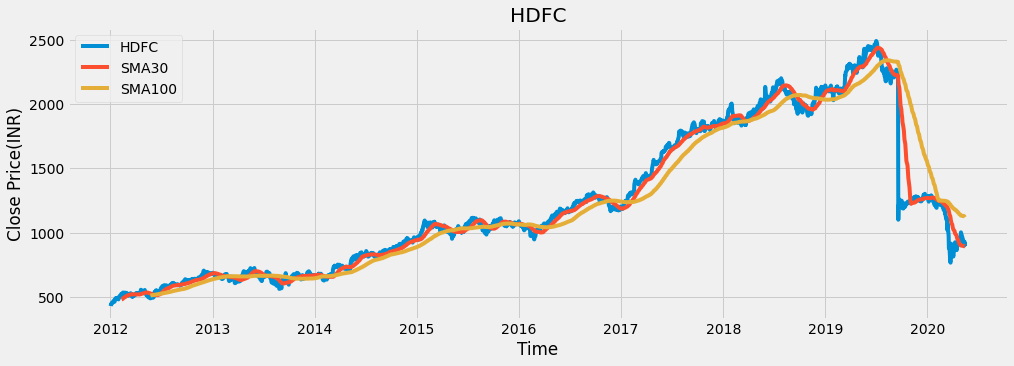

In [ ]:
#Visualize the data
plt.figure(figsize=(15,5))
plt.plot(df_in['Close'], label='HDFC')
plt.plot(SMA30['SMA30'], label = 'SMA30')
plt.plot(SMA100['SMA100'], label = 'SMA100')
plt.title('HDFC')
plt.xlabel('Time')
plt.ylabel('Close Price(INR)')
plt.legend(loc='upper left')
plt.show

<function matplotlib.pyplot.show>

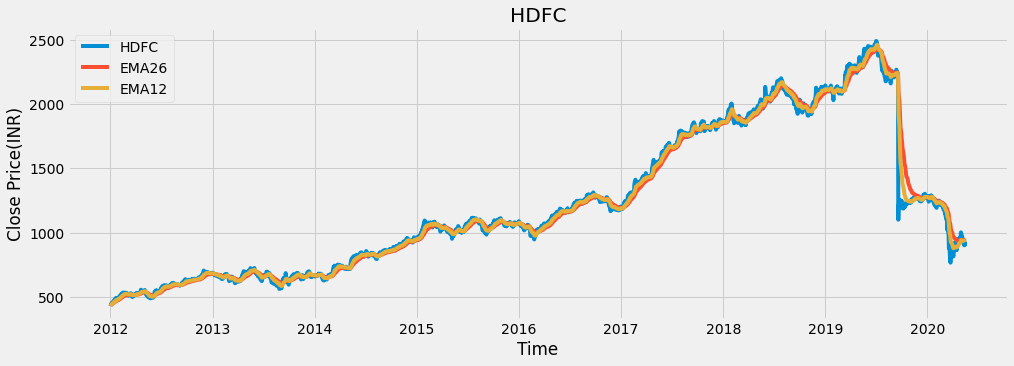

In [ ]:
#Visualize the data
plt.figure(figsize=(15,5))
plt.plot(df_in['Close'], label='HDFC')
plt.plot(EMA26['ema26'], label = 'EMA26')
plt.plot(EMA12['ema12'], label = 'EMA12')
#plt.plot(HDFCMACD['macd'], label = 'MACD')
plt.title('HDFC')
plt.xlabel('Time')
plt.ylabel('Close Price(INR)')
plt.legend(loc='upper left')
plt.show

In [ ]:
# Create a new DataFrame to store all the data
df =  pd.DataFrame()
df['Stock_Price'] = df_in['Close']
df['SMA30'] = SMA30['SMA30']
df['SMA100'] = SMA100['SMA100']
df['SMA_diff'] = df['SMA30'] - df['SMA100']
df['angle'] = np.tanh(df['SMA30'].shift(-1) - df['SMA30'])/(df['SMA30'] - df['SMA30'].shift(1))

In [ ]:
#Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  sigAnglePriceBuy = []
  sigAnglePriceSell = []
  Position = []
  Nmrator = []
  flag = -1

  for i in range(len(df)):
    if df['SMA30'][i] > df['SMA100'][i]:

      Position.append('Above')
      if df['angle'][i] > 2:
        sigAnglePriceBuy.append(np.nan)
        sigAnglePriceSell.append(df['Stock_Price'][i])
      else:
        sigAnglePriceBuy.append(np.nan)
        sigAnglePriceSell.append(np.nan)

      if flag != 1:
        sigPriceBuy.append(df['Stock_Price'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    elif df['SMA30'][i] < df['SMA100'][i]:

      Position.append('Below')
      if df['angle'][i] > 2:
        sigAnglePriceSell.append(np.nan)
        sigAnglePriceBuy.append(df['Stock_Price'][i])
      else:
        sigAnglePriceBuy.append(np.nan)
        sigAnglePriceSell.append(np.nan)

      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(df['Stock_Price'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
      sigAnglePriceBuy.append(np.nan)
      sigAnglePriceSell.append(np.nan)
      Position.append('Horizo')


  return (sigPriceBuy, sigPriceSell, Position, sigAnglePriceBuy,sigAnglePriceSell)

In [ ]:
buy_sell = buy_sell(df)
df['Buy_Signal_Price'] = buy_sell[0]
df['Sell_Signal_Price'] = buy_sell[1]
df['Altitude'] = buy_sell[2]
df['Buy_ASignal_Price'] = buy_sell[3]
df['Sell_ASignal_Price'] = buy_sell[4]


In [ ]:
filt = df['Stock_Price'] == df['2018':'2019-01-01']['Stock_Price'].max()
df.loc[filt]

,Stock_Price,SMA30,SMA100,SMA_diff,angle,Buy_Signal_Price,Sell_Signal_Price,Altitude,Buy_ASignal_Price,Sell_ASignal_Price
Date,,,,,,,,,,
2018-07-27,2203.4,2126.938333,2008.749,118.189333,0.173697,NaN,NaN,Above,NaN,NaN


In [ ]:
df['2018-07-27':'2018-08-27']

,Stock_Price,SMA30,SMA100,SMA_diff,angle,Buy_Signal_Price,Sell_Signal_Price,Altitude,Buy_ASignal_Price,Sell_ASignal_Price
Date,,,,,,,,,,
2018-07-27,2203.40,2126.938333,2008.7490,118.189333,0.173697,NaN,NaN,Above,NaN,NaN
2018-07-30,2172.25,2131.968333,2012.1270,119.841333,0.198795,NaN,NaN,Above,NaN,NaN
2018-07-31,2181.05,2137.156667,2015.4230,121.733667,0.192301,NaN,NaN,Above,NaN,NaN
2018-08-01,2157.35,2140.545000,2018.4645,122.080500,0.290484,NaN,NaN,Above,NaN,NaN
2018-08-02,2129.25,2142.963333,2021.0900,121.873333,0.357035,NaN,NaN,Above,NaN,NaN
2018-08-03,2121.00,2144.270000,2023.7010,120.569000,0.466554,NaN,NaN,Above,NaN,NaN
2018-08-06,2115.20,2144.978333,2026.1995,118.778833,1.217758,NaN,NaN,Above,NaN,NaN
2018-08-07,2132.15,2146.281667,2028.7200,117.561667,0.526196,NaN,NaN,Above,NaN,NaN
2018-08-08,2136.85,2147.121667,2031.5135,115.608167,-0.526465,NaN,NaN,Above,NaN,NaN


In [ ]:
#filt = ( (pd.notnull(df['Sell_Signal_Price'])) | (pd.notnull(df['Buy_Signal_Price'])) )
# filt =  (pd.isnull(df['Sell_Signal_Price']))
# df.loc[filt]
filt = df['Buy_Signal_Price'].notnull() | df['Sell_Signal_Price'].notnull()
filtered_df = df[filt]
filtered_df.tail()

,Stock_Price,SMA30,SMA100,SMA_diff,angle,Buy_Signal_Price,Sell_Signal_Price,Altitude,Buy_ASignal_Price,Sell_ASignal_Price
Date,,,,,,,,,,
2018-09-19,1961.95,2066.725000,2072.0420,-5.317000,0.188598,NaN,1961.95,Below,NaN,NaN
2018-12-18,2136.45,2042.958333,2041.3465,1.611833,0.158266,2136.45,NaN,Above,NaN,NaN
2019-08-08,2235.55,2339.628333,2343.8245,-4.196167,0.129922,NaN,2235.55,Below,NaN,NaN
2020-02-11,1240.05,1249.150000,1249.1170,0.033000,0.653243,1240.05,NaN,Above,NaN,NaN
2020-02-12,1249.05,1247.896667,1250.6035,-2.706833,0.570216,NaN,1249.05,Below,NaN,NaN


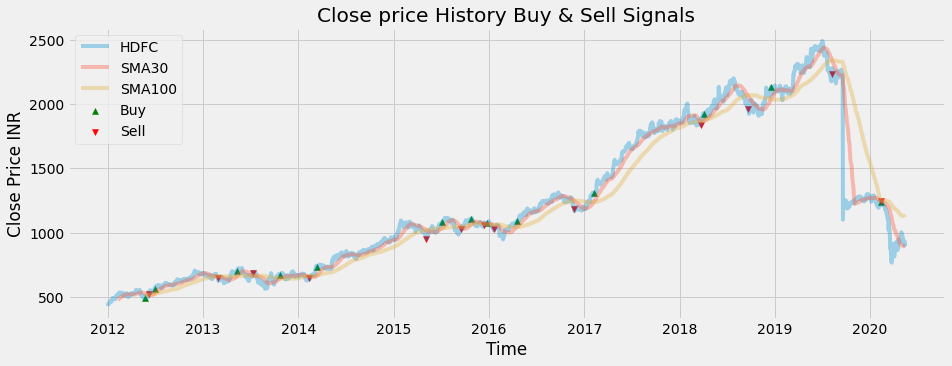

In [ ]:
# Visualize the data and teh strategy to buy and sell the stock
plt.figure(figsize=(14,5))
plt.plot(df['Stock_Price'], label=stock, alpha = 0.35)
plt.plot(df['SMA30'], label='SMA30', alpha = 0.35)
plt.plot(df['SMA100'], label='SMA100', alpha = 0.35)
#plt.plot(df['SMA_diff'], label='SMA_diff', alpha = 0.95)
plt.scatter(df.index, df['Buy_Signal_Price'], label='Buy', marker= '^', color='green')
plt.scatter(df.index, df['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Close price History Buy & Sell Signals')
plt.xlabel('Time')
plt.ylabel('Close Price INR')
plt.legend(loc='upper left')
plt.show()


In [ ]:
filt = df['Buy_Signal_Price'].notnull() | df['Sell_Signal_Price'].notnull()


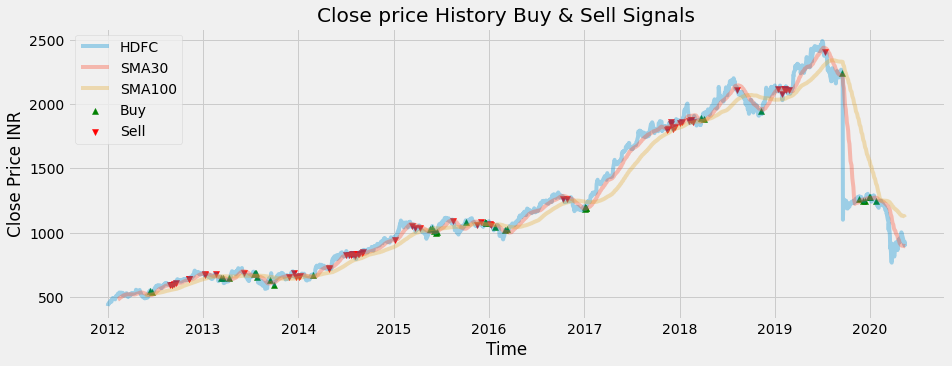

In [ ]:
# Visualize the data and teh strategy to buy and sell the stock
plt.figure(figsize=(14,5))
plt.plot(df['Stock_Price'], label=stock, alpha = 0.35)
plt.plot(df['SMA30'], label='SMA30', alpha = 0.35)
plt.plot(df['SMA100'], label='SMA100', alpha = 0.35)
#plt.plot(df['SMA_diff'], label='SMA_diff', alpha = 0.95)
plt.scatter(df.index, df['Buy_ASignal_Price'], label='Buy', marker= '^', color='green')
plt.scatter(df.index, df['Sell_ASignal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Close price History Buy & Sell Signals')
plt.xlabel('Time')
plt.ylabel('Close Price INR')
plt.legend(loc='upper left')
plt.show()

# SunPharma

In [ ]:
from datetime import date
today = date.today()
SunPharma = quandl.get('BSE/BOM532872', start_date='2017-01-01', end_date=today)
SunPharma= SunPharma.reset_index()
SunPharma.tail()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
820,2020-04-30,138.00,140.40,131.00,131.65,135.30,144420.0,4734.0,19539602.0,34948.0,24.20,9.40,-6.35
821,2020-05-11,135.75,135.75,131.40,132.05,133.32,64303.0,1536.0,8573110.0,11077.0,17.23,4.35,-3.70
822,2020-05-12,132.65,133.80,129.00,131.20,131.87,66634.0,1255.0,8787259.0,6876.0,10.32,4.80,-1.45
823,2020-05-13,134.30,134.35,131.05,132.75,132.24,47095.0,1137.0,6227793.0,9328.0,19.81,3.30,-1.55
824,2020-05-14,132.65,136.90,131.80,133.35,134.67,89756.0,2844.0,12087126.0,16833.0,18.75,5.10,0.70


In [ ]:
SunPharma.set_index('Date',inplace=True)
SunPharma.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2017-01-02,305.50,305.95,302.30,304.35,304.07,40802.0,1174.0,12406616.0,12512.0,30.67,3.65,-1.15
2017-01-03,305.20,312.30,304.05,309.40,309.19,27956.0,966.0,8643585.0,6870.0,24.57,8.25,4.20
2017-01-04,310.40,310.95,305.00,306.35,308.12,16126.0,639.0,4968805.0,7123.0,44.17,5.95,-4.05
2017-01-05,310.00,311.00,306.50,307.75,309.00,18108.0,779.0,5595403.0,6879.0,37.99,4.50,-2.25
2017-01-06,309.75,313.50,307.20,307.90,309.83,34507.0,1287.0,10691291.0,9688.0,28.08,6.30,-1.85


In [ ]:
SunPharmaSMA30 = pd.DataFrame()
SunPharmaSMA30['Close30'] = SunPharma['Close'].rolling(window=30).mean()
SunPharmaSMA100 = pd.DataFrame()
SunPharmaSMA100['Close100'] = SunPharma['Close'].rolling(window=100).mean()
# Exponetial Moving Average
SunPharmaEMA26 = pd.DataFrame()
SunPharmaEMA12 = pd.DataFrame()
SunPharmaMACD = pd.DataFrame()
SunPharmaEMA26['ema26'] = SunPharma['Close'].ewm(span = 26).mean().fillna(0)
SunPharmaEMA12['ema12'] = SunPharma['Close'].ewm(span = 12).mean().fillna(0)
SunPharmaMACD['macd'] = SunPharmaEMA12['ema12'] - SunPharmaEMA26['ema26']

<function matplotlib.pyplot.show>

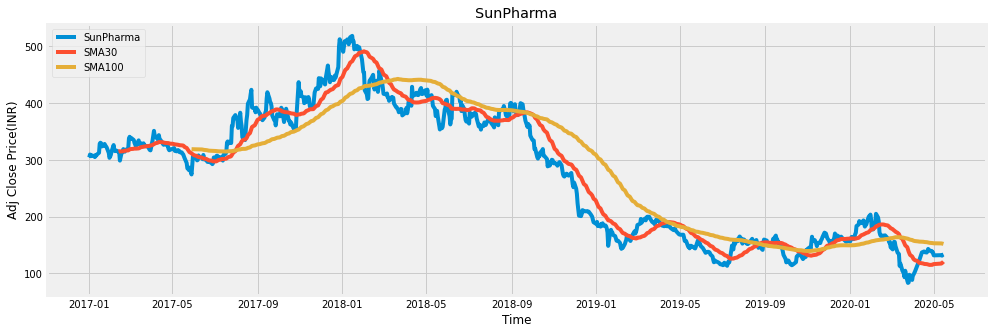

In [ ]:
#Visualize the data
plt.figure(figsize=(15,5))
plt.plot(SunPharma['Close'], label='SunPharma')
plt.plot(SunPharmaSMA30['Close30'], label = 'SMA30')
plt.plot(SunPharmaSMA100['Close100'], label = 'SMA100')
plt.title('SunPharma')
plt.xlabel('Time')
plt.ylabel('Adj Close Price(INR)')
plt.legend(loc='upper left')
plt.show

# Asian Paint

In [ ]:
from datetime import date
today = date.today()
AsianPaint = quandl.get('NSE/ASIANPAINT', start_date='2014-01-01', end_date=today)
AsianPaint= AsianPaint.reset_index()
AsianPaint.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1232,2018-12-31,1375.0,1378.00,1367.3,1369.00,1373.05,698593.0,9593.73
1233,2019-01-01,1373.2,1379.70,1358.6,1368.00,1371.55,664707.0,9097.71
1234,2019-01-02,1367.0,1386.85,1361.6,1380.05,1383.30,1233780.0,16981.45
1235,2019-01-03,1381.8,1393.85,1378.0,1387.00,1388.30,1636293.0,22724.90
1236,2019-01-04,1388.0,1401.40,1381.4,1383.00,1385.85,1202397.0,16756.02


In [ ]:
AsianPaint.set_index('Date', inplace=True)
AsianPaint.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2014-01-01,494.40,503.9,492.0,499.50,499.75,1866326.0,9339.39
2014-01-02,501.40,505.1,483.0,485.10,485.55,952911.0,4741.46
2014-01-03,483.00,491.5,480.0,490.00,489.50,994043.0,4848.06
2014-01-06,491.35,492.5,482.6,489.15,490.65,833555.0,4077.37
2014-01-07,491.00,493.5,484.0,490.00,489.95,708829.0,3468.99


In [ ]:
APSMA30 = pd.DataFrame()
APSMA30['Close30'] = AsianPaint['Close'].rolling(window=30).mean()
APSMA100 = pd.DataFrame()
APSMA100['Close100'] = AsianPaint['Close'].rolling(window=100).mean()
# Exponetial Moving Average
APEMA26 = pd.DataFrame()
APEMA12 = pd.DataFrame()
APMACD = pd.DataFrame()
APEMA26['ema26'] = AsianPaint['Close'].ewm(span = 26).mean().fillna(0)
APEMA12['ema12'] = AsianPaint['Close'].ewm(span = 12).mean().fillna(0)
APMACD['macd'] = APEMA12['ema12'] - APEMA26['ema26']

<function matplotlib.pyplot.show>

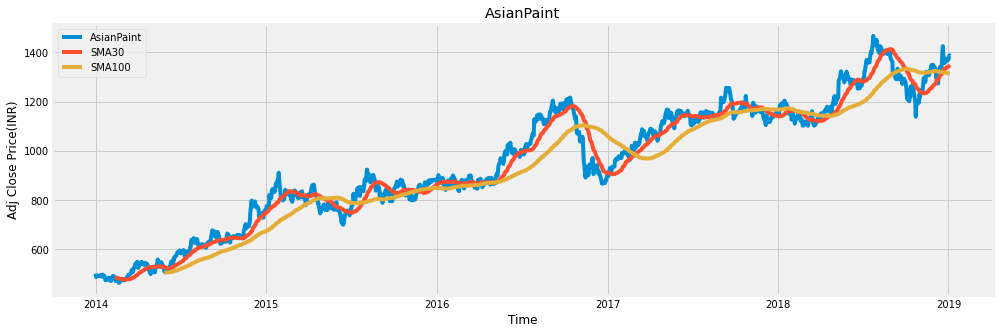

In [ ]:
#Visualize the data
plt.figure(figsize=(15,5))
plt.plot(AsianPaint['Close'], label='AsianPaint')
plt.plot(APSMA30['Close30'], label = 'SMA30')
plt.plot(APSMA100['Close100'], label = 'SMA100')
plt.title('AsianPaint')
plt.xlabel('Time')
plt.ylabel('Adj Close Price(INR)')
plt.legend(loc='upper left')
plt.show

# Exponetial Moving Average

In [ ]:
# Exponetial Moving Average
EMA26 = pd.DataFrame()
EMA12 = pd.DataFrame()
MACD = pd.DataFrame()
EMA26['ema26'] = df_in['Adj_Close'].ewm(span = 26).mean().fillna(0)
EMA12['ema12'] = df_in['Adj_Close'].ewm(span = 12).mean().fillna(0)
MACD['macd'] = EMA12['ema12'] - EMA26['ema26']

<function matplotlib.pyplot.show>

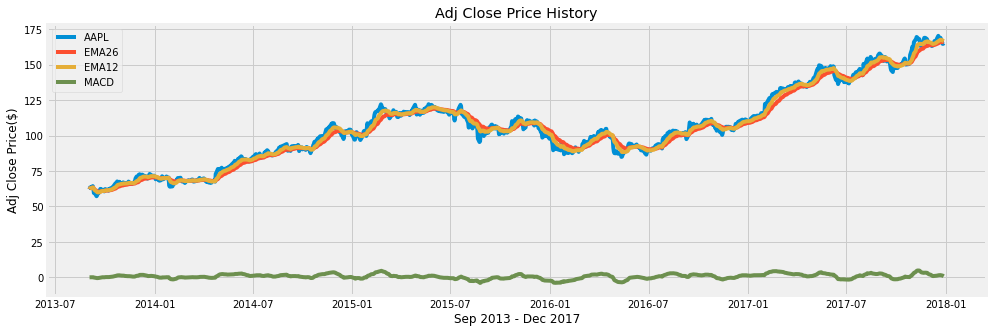

In [ ]:
#Visualize the data
plt.figure(figsize=(15,5))
plt.plot(df_in['Adj_Close'], label=stock)
#plt.plot(SMA30['Adj_Close'], label='SMA30')
#plt.plot(SMA100['Adj_Close'], label = 'SMA100')
plt.plot(EMA26['ema26'], label = 'EMA26')
plt.plot(EMA12['ema12'], label = 'EMA12')
plt.plot(MACD['macd'], label = 'MACD')
plt.title('Adj Close Price History')
plt.xlabel('Sep 2013 - Dec 2017')
plt.ylabel('Adj Close Price($)')
plt.legend(loc='upper left')
plt.show

# Portfolio Optimization
This program attempts to optimize a users portfolio using the Efficient Frontier <br>
https://www.youtube.com/watch?v=9fjs8FeLMJk

In [ ]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock symbol/tickers in the portfolio
#FAANG
assets = ['FB','AMZN','AAPL','NFLX','GOOG']

In [ ]:
#Assign Weights to the stock
weights = np.array([0.2,0.2,0.2,0.2,0.2])


In [ ]:
#Get the stock/portfolio starting/ending date
stockStartDate = '2013-01-01'
today = datetime.today().strftime('%Y-%m-%d')
today


'2020-05-15'

In [ ]:
# Create a DataFrame to store the adjusted close price of the stocks
df = pd.DataFrame()

# Store the adjusted Close Price
for stock in assets:
  df[stock] = web.DataReader(stock, data_source = 'yahoo', start = stockStartDate, end= today)['Adj Close']

In [ ]:
df.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823


In [ ]:
df.tail()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-05-11,213.179993,2409.000000,315.010010,440.519989,1403.260010
2020-05-12,210.100006,2356.949951,311.410004,431.820007,1375.739990
2020-05-13,205.100006,2367.919922,307.649994,438.269989,1349.329956
2020-05-14,206.809998,2388.850098,309.540009,441.950012,1356.130005
2020-05-15,209.149994,2382.750000,305.510010,446.089996,1368.779907


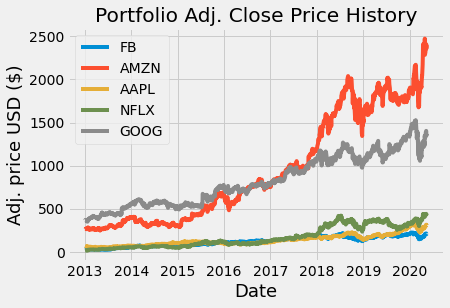

In [ ]:
# Visualization
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

# Create and Plot the Graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [ ]:
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-05-11,0.003909,0.012351,0.015735,0.011411,0.010725
2020-05-12,-0.014448,-0.021606,-0.011428,-0.019749,-0.019611
2020-05-13,-0.023798,0.004654,-0.012074,0.014937,-0.019197


In [ ]:
#Create and show the annualized covariance matrix

In [ ]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual


,FB,AMZN,AAPL,NFLX,GOOG
FB,0.115872,0.051798,0.040494,0.054023,0.048445
AMZN,0.051798,0.091992,0.035522,0.061136,0.046543
AAPL,0.040494,0.035522,0.076547,0.031755,0.037204
NFLX,0.054023,0.061136,0.031755,0.213776,0.048804
GOOG,0.048445,0.046543,0.037204,0.048804,0.064956


In [ ]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.05898365078204794

In [ ]:
# Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.24286549936548818

In [ ]:
# Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()* weights) * 252
portfolioSimpleAnnualReturn

0.34323574715317406

In [ ]:
# Show the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance, 2)*100) + '%'
percent_volatility = str(round(port_volatility, 2)*100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100) + '%'

print("Expected Annual Return: " + percent_ret)
print("Annual volatility / risk: " + percent_volatility)
print("Annual variance: " + percent_var)

Expected Annual Return: 34.0%
Annual volatility / risk: 24.0%
Annual variance: 6.0%


In [ ]:
#pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# Portfolio Optimizations:

# Calculated the expected returns and teh annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

{'FB': 0.15349, 'AMZN': 0.29159, 'AAPL': 0.19615, 'NFLX': 0.35878, 'GOOG': 0.0}
Expected annual return: 40.9%
Annual volatility: 27.5%
Sharpe Ratio: 1.42


(0.4085619501312495, 0.274522257380103, 1.4154114636805109)

In [ ]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print("Discrete Allocation: ", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete Allocation:  {'FB': 10.0, 'AMZN': 2.0, 'AAPL': 9.0, 'NFLX': 12.0}
Funds remaining: $40.33
